Insurance dataset is a data set about predicting the amount of insurance to pay for a patient, which includes the following features:
- age: Age of the patient, is a positive integer value
- sex: Patient's gender where 0 is male, 1 is female
- bmi: The patient's BMI, is the actual value
- children: Number of children of the patient, is a positive integer value
- smoker: Indicates whether the patient smokes, where 1 is yes and 0 is no
- region: Indicate the region the patient is in, 0 is southwest 1 is southeast 2 is northwest and 3 is northeast

In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [1]:
#import library
import pandas as pd # pandas 
import numpy as np # numpy

# Prepare Data

In [4]:
# read data using Pandas DataFrame
#data = pd.read_csv("/content/drive/MyDrive/Week 01/insurance.csv")
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Count'>

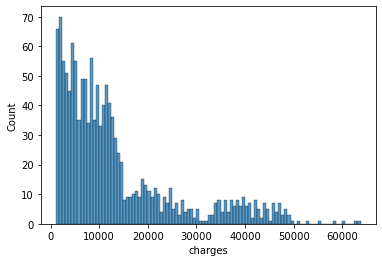

In [6]:
import seaborn as sns
sns.histplot(x="charges", data=data, bins=100)

In [7]:
# Null checking
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("Sample size:", len(data))
data = data.dropna()
print("Not null sample size:", len(data))

Sample size: 1338
Not null sample size: 1338


In [9]:
# data normalization
normalized_data = data.copy()
normalized_data["sex"] = normalized_data["sex"].apply(lambda x: 0 if x=="male" else 1)
normalized_data["smoker"] = normalized_data["smoker"].apply(lambda x: 0 if x=="no" else 1)
normalized_data["region"] = normalized_data["region"].apply(lambda x: 0 if x=="southwest" else 1 if x=="southeast" else 2 if x=="northwest"else 3 )
normalized_data

# Consider using get_dummies function for categorical columns (features)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [10]:
# Correlation
normalized_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

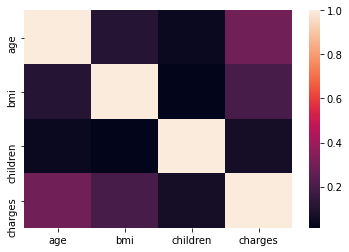

In [11]:
# Heatmap
import seaborn as sns
sns.heatmap(data.corr())

#model training

In [12]:
# Split X, y from dataset
columns = normalized_data.columns.tolist()     # Columns name
columns.remove('charges')           # Remove y label (column charges in this case)
feature_data = normalized_data[columns]        # X 
target_data = normalized_data.charges          # y

In [16]:
from sklearn.model_selection import train_test_split
trainX, testX ,trainY, testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=18)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(936, 6)
Test:(402, 6)


## mô hình Basic Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)    

In [18]:
model.fit(trainX, trainY)

LinearRegression()

In [19]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[  251.25523174   -46.21666435   285.113504     540.55465285
 23640.12023282   314.19918137]

-11253.913803855477


In [20]:
from sklearn.metrics import mean_absolute_error
pred = model.predict(testX) # Predict for the test set
mean_absolute_error(y_pred=pred, y_true=testY) # Calculate mae between test set and prediction

4161.023722991495

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [21]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) # should use include_bias=false b/c bias is included in LinearRegression() 
poly_model.fit(trainX, trainY)  
pred = poly_model.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

3053.6970837872605

degree of PolynomialFeatures function is defined by a tuple (x, y) where x is the smallest degree, y is the largest degree, if we only input 1 value t, the function will understand x = 0 and y = t

> Indented block
* if the 2nd order with 1 feature is $X_1$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_1^2$$
* if the 2nd order with 2 features is $X_1$ and $X_2$ then the equation is of the form:
$$\theta_0 + \theta_1*X_1+\theta_2*X_2+\theta_3*X_1^2 + \theta_4*X_2^2 + \theta_5*X_1*X_2$$

In [22]:
# --- To get output of polynomial model
# We can call its name
linear_model = poly_model["linearregression"]
# or by number
linear_model = poly_model[1]

## Bonus

We keep the basic linear regression model and change the order of the polinomial from 3 to 6 .

In [ ]:
#model basic 
model = LinearRegression(fit_intercept=True)   
model.fit(trainX, trainY)
#model polinomial 
poly_model = make_pipeline(PolynomialFeatures(6, include_bias=False), LinearRegression())
poly_model.fit(trainX,trainY) 

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('linearregression', LinearRegression())])

In [ ]:
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )
pred = poly_model.predict(testX)   
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )


mean absolute error của mô hình basic trên tập test là  4161.0237229914965
mean absolute error của mô hình polynomial trên tập test là  154563.71802432765


In [ ]:
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=pred, y_true=trainY) )


mean absolute error của mô hình basic trên tập training là  4075.7841276918757
mean absolute error của mô hình polynomial trên tập training là  1755.7432266931223


 This is an example for when the Linear Regression with Polynomial Transform model is better than without Polynomial Transform on the training set, but on the test set, the results are worse.

In addition, with the same Linear Regression with Polynomial Transform model, the results on the test set are worse than on the training set.

#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb or py file)

In [25]:
house = pd.read_csv("final_house_loan.csv")
house.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [26]:
house.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


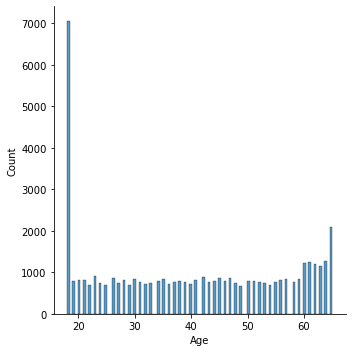

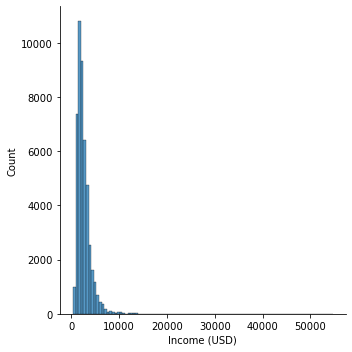

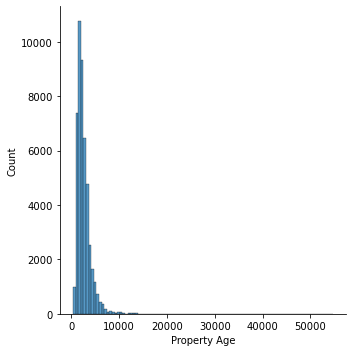

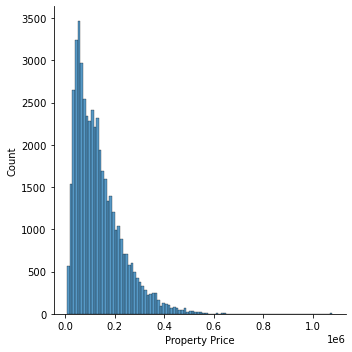

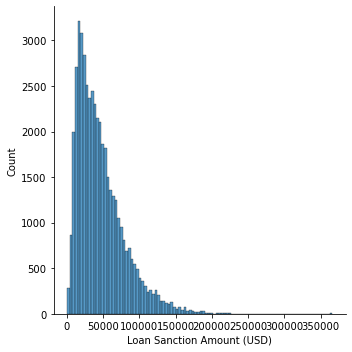

In [36]:
# kiem tra bien nao la bien so thi ve histogram
from pandas.api.types import is_numeric_dtype
for column in house.columns.tolist():
    if is_numeric_dtype(house[column]):
        sns.displot(x=column, data=house, bins=100)

In [28]:
#kiem tra co bao nhieu null o moi cot
house.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [31]:
print("Sample size:", len(house))
house = house.dropna()
print("Not null sample size:", len(house))

Sample size: 47297
Not null sample size: 47251


In [40]:
house.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [45]:
house['Income Stability'].unique()

array(['Low', 'High'], dtype=object)

In [46]:
house['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [44]:
normalized_house = house.copy()
normalized_house["Gender"] = normalized_house["Gender"].apply(lambda x: 0 if x=="M" else 1)
normalized_house["Income Stability"] = normalized_house["Income Stability"].apply(lambda x: 0 if x=="Low" else 1)
normalized_house["Property Location"] = normalized_house["Property Location"].apply(lambda x: 0 if x=="Rural" else 1 if x=="Urban" else 2 if x=="Semi-Urban"else 3 )
normalized_house

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,0,1651.25,0,59641.82,21026.420753
1,0,29,1989.71,0,1990.71,1,179858.51,60595.183366
2,1,37,1849.91,0,1856.91,0,117297.62,39181.648002
3,0,65,2735.18,1,2747.18,0,354417.72,128497.710865
4,1,62,4741.78,1,4740.78,1,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,1,62,2121.48,0,2135.48,0,240291.63,78800.491330
47293,0,38,1506.72,0,1505.72,0,218431.37,72483.293359
47294,1,20,1595.10,0,1582.10,2,154458.88,52462.861498
47295,1,50,2002.27,0,2007.27,2,72277.78,22909.596763


In [47]:
house.corr()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.044086,-0.044085,-0.003274,-0.000115
Income (USD),-0.044086,1.000000,0.999986,0.358110,0.392897
Property Age,-0.044085,0.999986,1.000000,0.358110,0.392892
Property Price,-0.003274,0.358110,0.358110,1.000000,0.994429
Loan Sanction Amount (USD),-0.000115,0.392897,0.392892,0.994429,1.000000


<AxesSubplot:>

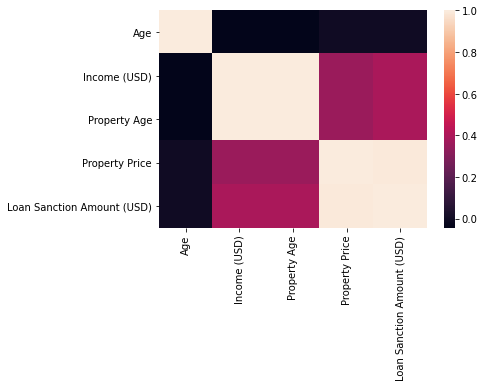

In [48]:
sns.heatmap(house.corr())

In [49]:
# Split X, y from dataset
columns = normalized_house.columns.tolist()     # Columns name
columns.remove('Loan Sanction Amount (USD)')           # Remove y label (column charges in this case)
feature_data = normalized_house[columns]        # X 
target_data = normalized_house['Loan Sanction Amount (USD)']          # y

In [52]:
from sklearn.model_selection import train_test_split
trainX, testX ,trainY, testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=18)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(33075, 7)
Test:(14176, 7)


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)   

In [56]:
model.fit(trainX,trainY)

LinearRegression()

In [57]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[ 2.60164273e+02 -7.90188570e+01  5.39906594e-01  1.11406591e+04
  4.87537805e-01 -1.29720936e+02  3.36164742e-01]

576.3603745683577
